Dengan menggunakan waterQuality1.csv, lakukanlah hal-hal berikut:
- Bagi menjadi data train dan test
- Normalisasi atau Standarisasi
- Lakukan Feature Selection atau Dimensionality Reduction pada data tersebut
- Perlihatkan perbedaan metric model (Akurasi, Precision, Recall, ROC AUC) antara sebelum dan sesudah melakukan Feature Selection atau Dimensionality Reduction
- Berikan komentar di setiap tahapan yang dilakukan

In [1]:
#import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree,decomposition
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report,roc_auc_score, precision_score, recall_score


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
#import data
df = pd.read_csv("waterQuality1.csv")
df.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,0.000,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,0.650,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,0.003,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,0.710,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,0.001,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


In [3]:
#check missing value
df.isnull().sum()

aluminium      0
ammonia        0
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        0
dtype: int64

In [4]:
#check data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

#Data Preprocess

In [5]:
#checking y target
Counter(df['is_safe'])

Counter({'#NUM!': 3, '0': 7084, '1': 912})

In [6]:
#drop other from gender
other = df[df['is_safe'] == '#NUM!'].index
df.drop(other, axis=0, inplace= True)

In [7]:
#changing text to integer
is_safe = {'1': 1,'0': 0}
df.is_safe = [is_safe[item] for item in df.is_safe]

In [8]:
#separate future data and target data
X=df.drop(['is_safe'],1)
y=df['is_safe']

In [9]:
#standarization data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X) 
scaled_data= pd.DataFrame(scaled_data,columns = X.columns)
scaled_data

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium
0,0.777403,-0.585491,-0.480875,1.054205,-0.993241,-0.711941,2.152993,-0.973050,-1.657446,-0.363345,-0.869387,-0.781070,1.129767,-0.348629,0.609178,1.203362,1.661842,1.053694,1.338736,-0.917040
1,1.306945,0.775118,-0.599632,1.432447,-1.131948,1.208552,1.598765,-0.223303,0.294799,1.002460,0.849782,0.009785,-1.409197,1.046960,-0.739005,0.892977,0.124811,1.053694,0.851134,0.198023
2,0.271572,-0.029083,-0.480875,-0.812340,-0.965499,0.803417,1.044536,-1.202564,0.501507,-0.818614,-0.861452,-0.368450,0.783298,-0.383518,0.272132,1.911763,1.786699,0.706129,2.035310,-1.288728
3,0.548198,-0.332067,-0.480875,1.144654,-1.159690,1.968179,-0.802892,1.306793,0.708215,1.184567,1.008475,-1.434385,-1.517469,-0.069511,-0.401960,-0.415275,-0.516695,-1.031700,2.104968,0.198023
4,0.200439,1.132165,-0.520460,-1.124801,-1.020982,0.191820,1.635713,-0.361012,-0.371261,-0.575804,-0.866742,0.302058,-0.555658,-0.383518,-0.739005,0.024578,-0.219622,-1.031700,-0.611672,-0.917040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7991,-0.487175,-0.731915,-0.639217,0.314165,-0.077771,-0.809330,-0.802892,-1.187263,1.374275,-0.970370,-0.869387,1.677459,0.806757,-0.575412,-0.064914,-0.729052,-0.340173,1.401260,-0.611672,-0.545353
7992,-0.487175,1.119776,-0.560046,-0.804117,-0.910016,-0.672986,-0.839840,-1.202564,1.626919,-0.970370,-0.869387,-1.176498,0.081339,-0.575412,-1.413097,-0.847213,-0.779325,1.401260,-0.333042,1.313085
7993,-0.455561,-0.836663,-0.639217,-0.787672,-0.355186,-0.828807,-0.728995,-1.202564,0.317766,-0.970370,-0.869387,1.419571,1.100895,-0.575412,-1.750143,-0.854563,0.826593,-1.726831,-0.750986,0.198023
7994,-0.518790,-0.481869,-0.599632,0.355278,-1.187431,-0.069180,-0.913738,-1.095458,-1.772284,-0.970370,-0.869387,-1.709466,-1.771906,-2.319897,-1.750143,-0.930887,-1.257225,-1.726831,-1.029616,-1.660415


In [10]:
#assign scaled data to x
X= scaled_data

In [11]:
#splitting data
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.25, stratify=y, random_state=0)

In [12]:
#handling imbalance dataset

smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [13]:
#adding header to X_smote
X_smote = pd.DataFrame(data =X_smote, columns= X.columns)

In [14]:
X_smote

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium
0,-0.487175,-1.541747,-0.401703,-0.680777,-1.187431,-0.809330,-0.692046,1.092580,-0.026748,0.759650,0.638192,0.955373,-0.247084,1.099294,-1.076051,-0.909403,-0.236843,1.748826,-0.681329,1.313085
1,-0.518790,0.534083,-0.480875,0.149712,-1.104207,1.582522,1.192330,1.674016,-0.761710,1.579133,1.352308,-1.228075,0.292468,0.872511,-0.739005,0.859621,1.890029,-1.031700,2.035310,0.198023
2,-0.510886,-1.059677,-0.401703,-0.524546,0.477060,-0.657404,-0.765943,-1.095458,0.111058,-0.940019,-0.850872,0.783448,-0.506936,-0.697526,-0.739005,-0.920710,-0.193789,-1.031700,-0.402699,0.941398
3,-0.455561,-1.441504,-0.560046,-1.067242,1.031890,-0.821016,-0.692046,0.893667,0.960859,-0.970370,-0.866742,1.625881,-1.503032,-2.232673,1.283269,-0.914491,0.736179,1.053694,-1.029616,-0.917040
4,1.638897,-0.967318,3.002664,-0.236753,0.477060,-0.014643,1.820456,1.429201,0.455572,-0.970370,-0.858807,1.711844,0.729163,0.732952,0.272132,-0.608629,0.977282,0.706129,2.035310,1.313085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10621,2.408162,-0.378180,-0.524209,1.871972,-0.997770,0.531542,1.477812,0.027009,-0.435382,-0.970370,-0.869387,-1.320775,-1.252735,0.396588,0.576159,-0.633613,0.176407,-0.718183,-0.126344,0.581848
10622,3.229912,-1.017412,-0.551647,-1.040079,-1.159690,0.976836,1.312139,0.021053,0.794505,1.532221,1.311428,0.051989,-1.651111,-0.143522,-0.136424,0.230238,-0.558825,0.495475,0.359321,1.200448
10623,1.496688,-1.025914,-0.520460,-0.131719,-1.060740,0.767475,1.186205,-1.041754,0.792921,-0.970370,-0.869387,0.920651,-0.176313,0.894403,0.755172,-0.488783,0.542351,0.524602,1.837886,0.763836
10624,-0.091857,-1.359348,-0.548322,-0.957483,-1.073372,0.240575,1.424192,1.247029,-0.218971,-0.517957,-0.867672,-1.199381,-1.508698,-0.085922,0.490566,-0.269301,-0.444388,-1.379266,1.901092,-0.283746


#Model

In [15]:
#create model
from sklearn.ensemble import RandomForestClassifier
import numpy as np
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_smote, y_smote)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [16]:
#get data importance feature
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
aluminium,0.211
cadmium,0.125
arsenic,0.080
silver,0.070
chloramine,0.063
perchlorate,0.062
viruses,0.050
uranium,0.046
nitrites,0.039


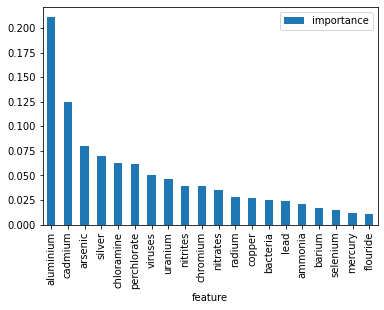

In [17]:
#plotting importance feature
importances.plot.bar()

In [18]:
#confusion matrix
predictions_test = cross_val_predict(rf, X_test, y_test, cv=3)
confusion_matrix(y_test, predictions_test)

array([[1756,   15],
       [  98,  130]])

In [19]:
#to get roc score
rf_probs = rf.predict_proba(X_test)
rf_probs = rf_probs[:, 1]

In [20]:
print("Accuracy:", rf.score(X_test, y_test))
print("Precision:", precision_score(y_test, predictions_test))
print("Recall:",recall_score(y_test, predictions_test))
print("ROC Score:",roc_auc_score(y_test, rf_probs))

Accuracy: 0.9564782391195598
Precision: 0.896551724137931
Recall: 0.5701754385964912
ROC Score: 0.9783512635343299


#New Feature Model

In [21]:
#getting feature importances
from sklearn.feature_selection import SelectFromModel

selector = SelectFromModel(estimator=rf)
selector.fit(X_train, y_train)

print("Feature Importances")
print(selector.estimator_.feature_importances_)
print("Threshold")
print(selector.threshold_)
print("Keep Features?")
print(selector.get_support())

Feature Importances
[0.20450493 0.04609793 0.06983637 0.02789604 0.11839263 0.04661181
 0.02940125 0.02530195 0.02086191 0.02707399 0.03048537 0.0255843
 0.03773738 0.0340425  0.01512187 0.11295029 0.03307015 0.01690561
 0.04809997 0.03002377]
Threshold
0.05
Keep Features?
[ True False  True False  True False False False False False False False
 False False False  True False False False False]


In [22]:
#finding lowest importance features
importances.tail(10)

,importance
feature,
nitrates,0.035
radium,0.028
copper,0.027
bacteria,0.025
lead,0.024
ammonia,0.021
barium,0.017
selenium,0.015
mercury,0.012


In [23]:
#drop 10 lowest importance feature and assign to new variable
X_smote_new  = X_smote.drop(['flouride','mercury','selenium','barium','lead','ammonia','radium','copper','nitrates'], axis=1)
X_test_new  =  X_test.drop(['flouride','mercury','selenium','barium','lead','ammonia','radium','copper','nitrates'], axis=1)

In [24]:
#making new model
rf.fit(X_smote_new, y_smote)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [25]:
#confusion matrix
predictions_test_new = cross_val_predict(rf, X_test_new, y_test, cv=3)
confusion_matrix(y_test, predictions_test_new)

array([[1748,   23],
       [  95,  133]])

In [26]:
#to get roc score
rf_probs = rf.predict_proba(X_test_new)
rf_probs = rf_probs[:, 1]

In [27]:
print("Accuracy:", rf.score(X_test_new, y_test))
print("Precision:", precision_score(y_test, predictions_test_new))
print("Recall:",recall_score(y_test, predictions_test_new))
print("ROC Score:",roc_auc_score(y_test, rf_probs))

Accuracy: 0.9389694847423712
Precision: 0.8525641025641025
Recall: 0.5833333333333334
ROC Score: 0.9636492416812783


Kesimpulan:
dengan membuang 10 fitur terbawah:
1. Akurasi hanya menurun sekitar 2% dari 95.64% ke 93.89%
2. Presisi menurun 4% dari 89.66% menjadi 85.25%
3. Recall meningkat dari 57.01% menjadi 58.33%
4. ROC Score menurun 1% dari 97.84% menjadi 96.36%
Overall dengan mengurangi 10 fitur terbawah, akurasi, presisi dan ROC hanya menurun sedikit dan masih acceptable, recall malah meningkat menjadi 58.33% dari 57.01%